# Predicción de precios de automóviles

### En este módulo utilizaremos algunos modelos de regresión para predecir los precios de los automóviles. Además, calcularemos métricas para cada uno de ellos y al final elegiremos el que mejor predice los valores, evitando el sobreajuste (overfitting) 

Primero, importaremos las bibliotecas que utilizaremos por ahora.

In [11]:
# 
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

%matplotlib inline
sns.set(style="darkgrid")
# Suppress warnings
warnings.filterwarnings("ignore")
#
dataframe = pd.read_csv(r'/Users/jorgeemiliano/Desktop/predicao-precos/true_car_listings.csv')

Sería interesante tener una visión general de cómo está organizado nuestro conjunto de datos. Para ello vamos a imprimir el nombre de las columnas:

In [12]:
print(dataframe.columns)

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model'], dtype='object')


Al observar las columnas, notamos la columna 'Vin', que es el número de Identificacion del Vehículo. Este código se utiliza únicamente con fines de registro. Además es posible que tengamos elementos duplicados. Sabiendo esto, es interesante realizar el primer filtrado del conjunto de datos.

In [16]:
dataframe_filtered = dataframe.drop(['Vin'], axis=1)
dataframe_filtered = dataframe_filtered.drop_duplicates()

Vmaos a hacer una revisión general de nuestro marco de datos filtrado, ordenándolo por precio de forma descendente con el objetivo de identificar valores muy por debajo o por encima, es decir, valores atípicos.

{'whiskers': [<matplotlib.lines.Line2D at 0x123dd3790>,
 'caps': [<matplotlib.lines.Line2D at 0x123dd1850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1258c2090>],
 'medians': [<matplotlib.lines.Line2D at 0x123dd12d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x123dd2610>],
 'means': []}

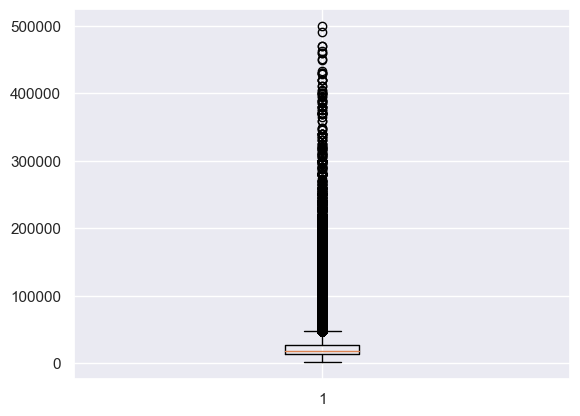

In [17]:
plt.boxplot(dataframe['Price'])

Con este gráfico, descubrimos dos cosas:
I) No hay elementos atípicos evidentes.
II) La mayoría de los precios son bajos.

## Cuestionamiento: ¿Influye el estado en el precio de los vehículos?

Para responder a esto, vamos a trazar un gráfico del promedio de precios y ver si existe una variación considerable para determinar si la variable "State" es importante para nosotros 

{'whiskers': [<matplotlib.lines.Line2D at 0x1223a0a50>,
 'caps': [<matplotlib.lines.Line2D at 0x122378890>,
 'boxes': [<matplotlib.lines.Line2D at 0x1223a10d0>],
 'medians': [<matplotlib.lines.Line2D at 0x12237a6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1228c2d10>],
 'means': []}

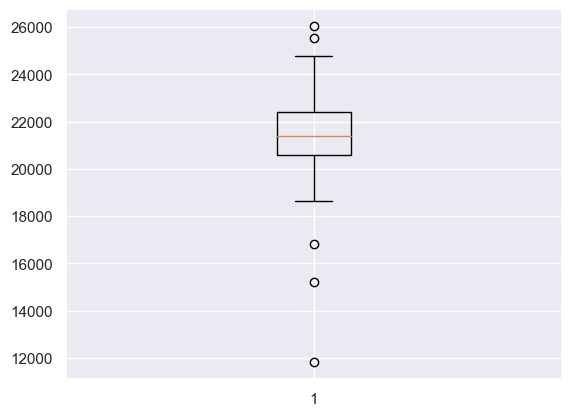

In [18]:
#
df_prices_states = dataframe_filtered[["Price","State"]]
df_prices_states = df_prices_states.groupby("State").mean().reset_index()
df_prices_states = df_prices_states.sort_values(by='Price', ascending=False)

# print(df_prices_states)

plt.boxplot(df_prices_states['Price'])

Observamos que en el promedio de precios en los estados es bastante similar, por lo tanto, inferimos que el promedio de los precios en sus ciudades también es similar. Con esto, podemos eliminar las varibles "State" y "City" de nuestros datos.

In [19]:
dataframe_filtered = dataframe_filtered.drop(columns=['City', 'State'], axis=1)
dataframe_filtered = dataframe_filtered.drop_duplicates()
print(dataframe_filtered)

        Price  Year  Mileage   Make         Model
0        8995  2014    35725  Acura    ILX6-Speed
1       10888  2013    19606  Acura    ILX5-Speed
2        8995  2013    48851  Acura    ILX6-Speed
3       10999  2014    39922  Acura    ILX5-Speed
4       14799  2016    22142  Acura  ILXAutomatic
...       ...   ...      ...    ...           ...
852117  63215  2017        9  Volvo         S90T6
852118  72260  2017     3201  Volvo        XC90T6
852119  55999  2016    28941  Volvo       XC90AWD
852120  60240  2017     3005  Volvo           V90
852121  76995  2017     2502  Volvo        XC90T8

[851154 rows x 5 columns]


## Preparándose para el modelo

 Antes de dividir nuestros datos en entrenamiento y prueba, vamos a realizar la codificación one-hotde nuestras variables categóricas.

In [20]:
dataframe_filtered['Model'] = dataframe_filtered['Model'].str.replace(',', '')
dataframe_filtered['Model'] = dataframe_filtered['Model'].str.upper()

# print(dataframe_filtered['Model'].str.upper())
# print(pd.get_dummies(dataframe_filtered).columns)

# dataframe_filtered = pd.get_dummies(dataframe_filtered)
dataframe_filtered.to_csv('dataframe_filterd.csv', encoding='utf-8')

In [21]:
frametest = pd.read_csv('/Users/jorgeemiliano/Desktop/predicao-precos/dataframe_filtered.csv')
print(frametest.shape[0])

851154
